Text to Image generation using hugging face models - Stable Diffusion and
Diffusers

In [2]:
!pip install diffusers transformers accelerate

In [3]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

# Using model_id1
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
# prompt = """dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
# extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans
# """

prompt="""A person stands with their back turned, gazing up at the vast sky.
The background is a deep, intense red with fiery tones, creating a dramatic, almost surreal atmosphere.
The scene has strong, warm lighting from the flames and gives a sense of contemplation and awe.
"""


In [12]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

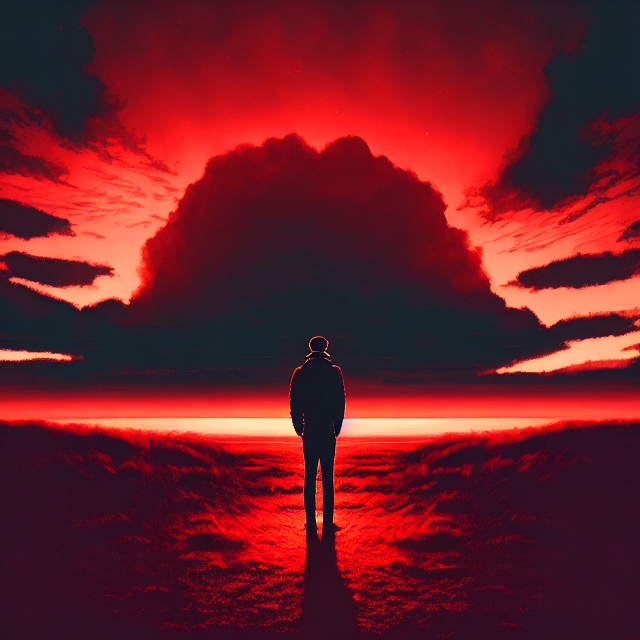

In [13]:
image

[PROMPT]:  A person stands with their back turned, gazing up at the vast sky. 
The background is a deep, intense red with fiery tones, creating a dramatic, almost surreal atmosphere. 
The scene has strong, warm lighting from the flames and gives a sense of contemplation and awe.



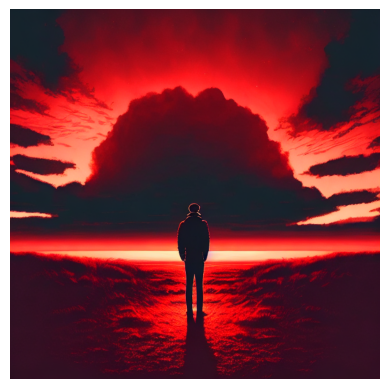

In [14]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [17]:
prompt2 = """"A young woman sits regally on a grand throne, a golden crown placed upon her head.
Her expression is serious and resolute, reflecting the challenges she has overcome to earn her place.
She sits upright, radiating a powerful presence, with a gaze that conveys both wisdom and strength.
The throne room is dimly lit, emphasizing her figure and the crown as symbols of hard-won authority and resilience."
"""

image = pipe(prompt2).images[0]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['crown as symbols of hard - won authority and resilience."']


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  "A young woman sits regally on a grand throne, a golden crown placed upon her head. 
Her expression is serious and resolute, reflecting the challenges she has overcome to earn her place. 
She sits upright, radiating a powerful presence, with a gaze that conveys both wisdom and strength. 
The throne room is dimly lit, emphasizing her figure and the crown as symbols of hard-won authority and resilience."



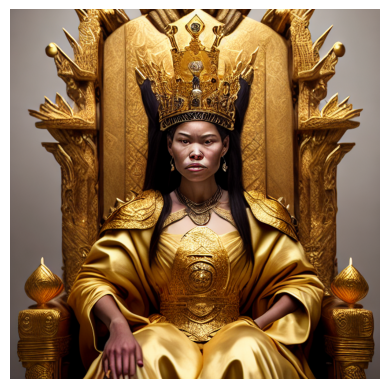

In [18]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

## The following parameters can be passed in stable diffusion
* Height
* Weight
* Number of images per prompt
* Number of inference steps
* Negative prompting

In [19]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [28]:
prompt = """A cricketer walks onto the stadium field with a confident, heroic stride, surrounded by the roaring cheers of thousands of fans shouting his name.
He looks composed yet intense, with a determined expression and a hint of a smile, acknowledging the crowd’s admiration.
The stadium lights cast a dramatic glow, creating a cinematic atmosphere as he steps forward like a true sports icon, ready to take on the game."""

params = {}

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['to take on the game.']


  0%|          | 0/50 [00:00<?, ?it/s]

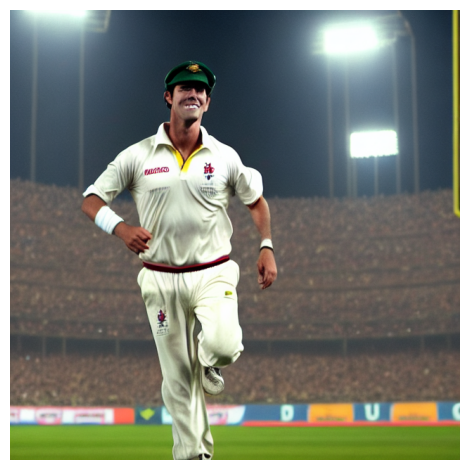

In [29]:
generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['to take on the game.']


  0%|          | 0/100 [00:00<?, ?it/s]

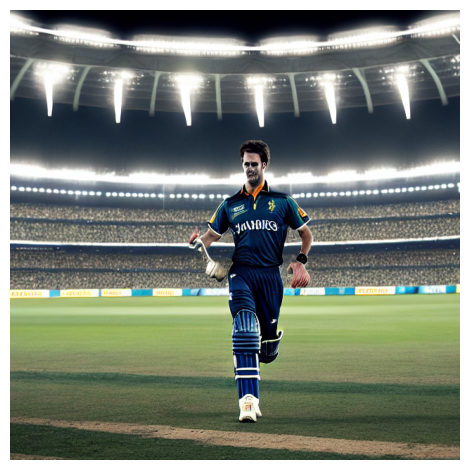

In [31]:
# Number of inference steps. We are adding the parameters.
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['star ’ s arrival. the scene radiates luxury and fame, with a touch of mystery in his composed expression."']


  0%|          | 0/100 [00:00<?, ?it/s]

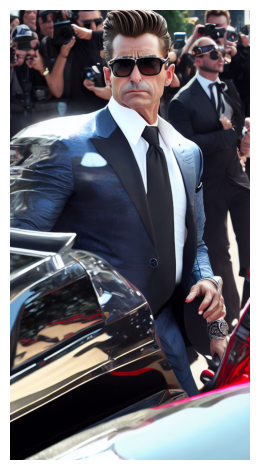

In [33]:
# Height and Width are passes to resize the image
prompt=""""A film actor steps out of an extravagant, sleek car with an aura of confidence and style.
Dressed in a sharp, elegant outfit, he exudes charisma as he adjusts his sunglasses, casually glancing at his surroundings.
The car door opens against a backdrop of flashing lights and a crowd of fans and paparazzi, capturing the glamor and excitement of a movie star’s arrival.
The scene radiates luxury and fame, with a touch of mystery in his composed expression."
"""
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['lively, capturing the festive spirit and energy of the holi festival of colors."']


  0%|          | 0/100 [00:00<?, ?it/s]

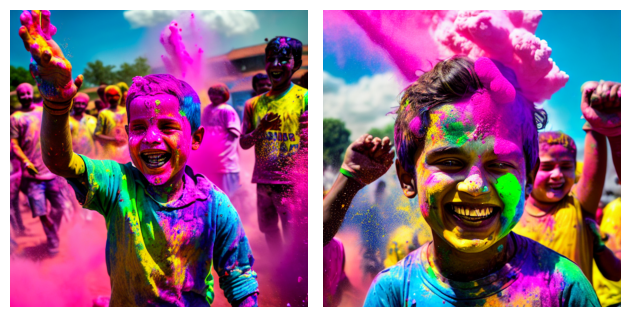

In [35]:
# We can also define number of images per prompt.
prompt=""""A young boy joyfully plays Holi, his face and clothes splashed with vibrant colors, as he laughs and throws handfuls of powdered colors into the air.
Around him, people of all ages celebrate, their faces beaming with smiles, covered in shades of pink, green, and blue.
The air is filled with clouds of colorful powder, and the atmosphere is lively, capturing the festive spirit and energy of the Holi festival of colors."
"""
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['lively, capturing the festive spirit and energy of the holi festival of colors."']


  0%|          | 0/100 [00:00<?, ?it/s]

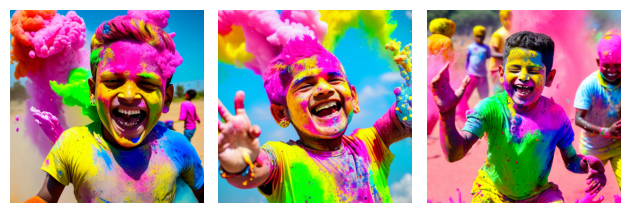

In [39]:
# Here Negative prompt is given.
params = {'num_inference_steps': 100, 'num_images_per_prompt': 3, 'negative_prompt': 'no dark colors, no sadness, no night-time lighting, no moody atmosphere,'}

generate_image(pipe, prompt, params)